Digite o grau do polinômio: 1
Digite os 2 pontos (x, y):
x[0]: 7
y[0]: 3940
x[1]: 13
y[1]: 4755

Polinômio de Lagrange:
135.833333333333⋅x + 2989.16666666667

Digite o valor de x para estimar y: 10
Estimativa: y(10.0) ≈ 4347.500000


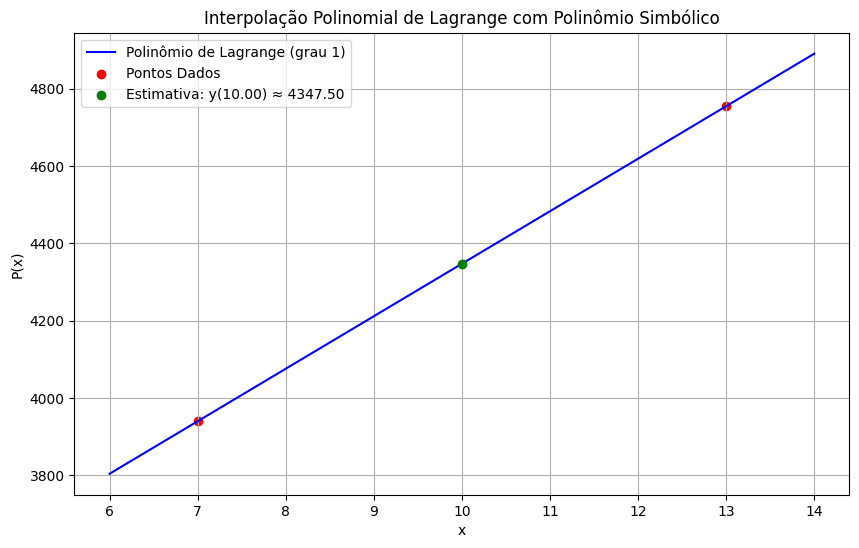

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Variável simbólica
x = sp.Symbol('x')

# Solicita o grau do polinômio
grau = int(input("Digite o grau do polinômio: "))
n = grau + 1

x_vals = []
y_vals = []

print(f"Digite os {n} pontos (x, y):")
for i in range(n):
    xi = float(input(f"x[{i}]: "))
    yi = float(input(f"y[{i}]: "))
    x_vals.append(xi)
    y_vals.append(yi)

# Constrói o polinômio de Lagrange simbolicamente
def polinomio_lagrange_simbolico(x_vals, y_vals):
    n = len(x_vals)
    P = 0
    for i in range(n):
        xi, yi = x_vals[i], y_vals[i]
        Li = 1
        for j in range(n):
            if j != i:
                xj = x_vals[j]
                Li *= (x - xj) / (xi - xj)
        P += yi * Li
    return sp.simplify(P)

# Obtém o polinômio
P_x = polinomio_lagrange_simbolico(x_vals, y_vals)

# Mostra o polinômio formatado
print("\nPolinômio de Lagrange:")
sp.pprint(P_x, use_unicode=True)

# Estimar y em um ponto fornecido pelo usuário
x_est = float(input("\nDigite o valor de x para estimar y: "))
P_lambd = sp.lambdify(x, P_x, modules=["numpy"])
y_est = P_lambd(x_est)
print(f"Estimativa: y({x_est}) ≈ {y_est:.6f}")

# Gráfico
x_interp = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 500)
y_interp = P_lambd(x_interp)

plt.figure(figsize=(10, 6))
plt.plot(x_interp, y_interp, label=f'Polinômio de Lagrange (grau {grau})', color='blue')
plt.scatter(x_vals, y_vals, color='red', label='Pontos Dados')
plt.scatter(x_est, y_est, color='green', label=f'Estimativa: y({x_est:.2f}) ≈ {y_est:.2f}', zorder=5)
plt.title('Interpolação Polinomial de Lagrange com Polinômio Simbólico')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.grid(True)
plt.legend()
plt.show()
